In [32]:
#import the needed Libraries

import pandas as pd
import numpy as np
import glob

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

import nltk
from nltk.corpus import stopwords
import re
import seaborn as sns
import itertools
import collections
from textblob import TextBlob

In [2]:
#Lets read in all the files into one dataframe

path = r'./Data' # Define the Data path
all_files = glob.glob(path + "/*.csv")

#initiate an empty list
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

In [154]:
#lets see the dataframe
df.head(10)

Unnamed: 0                      name                 time  \
0           0                  accryda3  2019-11-02 21:02:16   
1           1             Temisan Okomi  2019-11-02 21:02:15   
2           2                     Ope!™  2019-11-02 21:02:14   
3           3                        S.  2019-11-02 21:02:14   
4           4             Zeelicious!!!  2019-11-02 21:02:14   
5           5           Afro Base NG 🇳🇬  2019-11-02 21:02:14   
6           6            Victor Adegite  2019-11-02 21:02:14   
7           7                 Kelvin K.  2019-11-02 21:02:13   
8           8  Ghost ST. Patrick™.. |🇳🇬  2019-11-02 21:02:13   
9           9                  Accryda2  2019-11-02 21:02:13   

                                               tweet           place  \
0  Selling: 898m Land on Elm Street, Osborne Phas...  Lagos, Nigeria   
1  @iamkosby1 @KingArthur9ja @BarakisLight The ma...         Nigeria   
2                 @crazylifevj have you seen this???  Lagos, Nigeria   
3                @Onumashaka Man you're full of shit  Lagos, Nigeria   
4  I’m hitched to Mistokeke @MrOkeke_ https://t.c...  Lagos, Nigeria   
5  RT ComplexMusic: .lilyachty IN THE BUILDING. #...  lagos, Nigeria   
6                               @presh189 Congrats !  Lagos, Nigeria   
7          @_youngking Uber to yours or from yours??     Ajah, Lagos   
8              @Peruzi_VlBES #QuidaxBitcoin11  bader  Lagos, Nigeria   
9  Selling: 898m Land on Elm Street, Osborne Phas...  Lagos, Nigeria   

   retweet-count  
0              0  
1              0  
2              0  
3              0  
4              0  
5              0  
6              0  
7              0  
8              0  
9              0

In [15]:
#Import the libraries
from textblob import TextBlob
import nltk
from newspaper import Article

In [17]:
#remove urls

def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

all_tweets_no_urls = [remove_url(tweet) for tweet in df['tweet']]
all_tweets_no_urls[:5]

#Text Cleanup - Address Case Issues and split into words
words_in_tweet = [tweet.lower().split() for tweet in all_tweets_no_urls]
words_in_tweet[0]

['selling', '898m', 'land', 'on', 'elm', 'street', 'osborne', 'phase', '2']

In [153]:
# List of all words across tweets
all_words_no_urls = list(itertools.chain(*words_in_tweet))

# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)

#We need to remove stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

#I added some additional stop-words to accomodate pidgin
stop_words.update(['im','u','dey','go','dey','get','na','us','amp'])

tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

all_words_nsw = list(itertools.chain(*tweets_nsw))

#we use the counter again
counts_nsw = collections.Counter(all_words_nsw)

#Top ten most used words
counts_nsw.most_common(10)

[nltk_data] Downloading package stopwords to /Users/admin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('like', 1836),
 ('dont', 1768),
 ('one', 1408),
 ('know', 1266),
 ('people', 1098),
 ('see', 1060),
 ('god', 1015),
 ('love', 998),
 ('please', 893),
 ('need', 890)]

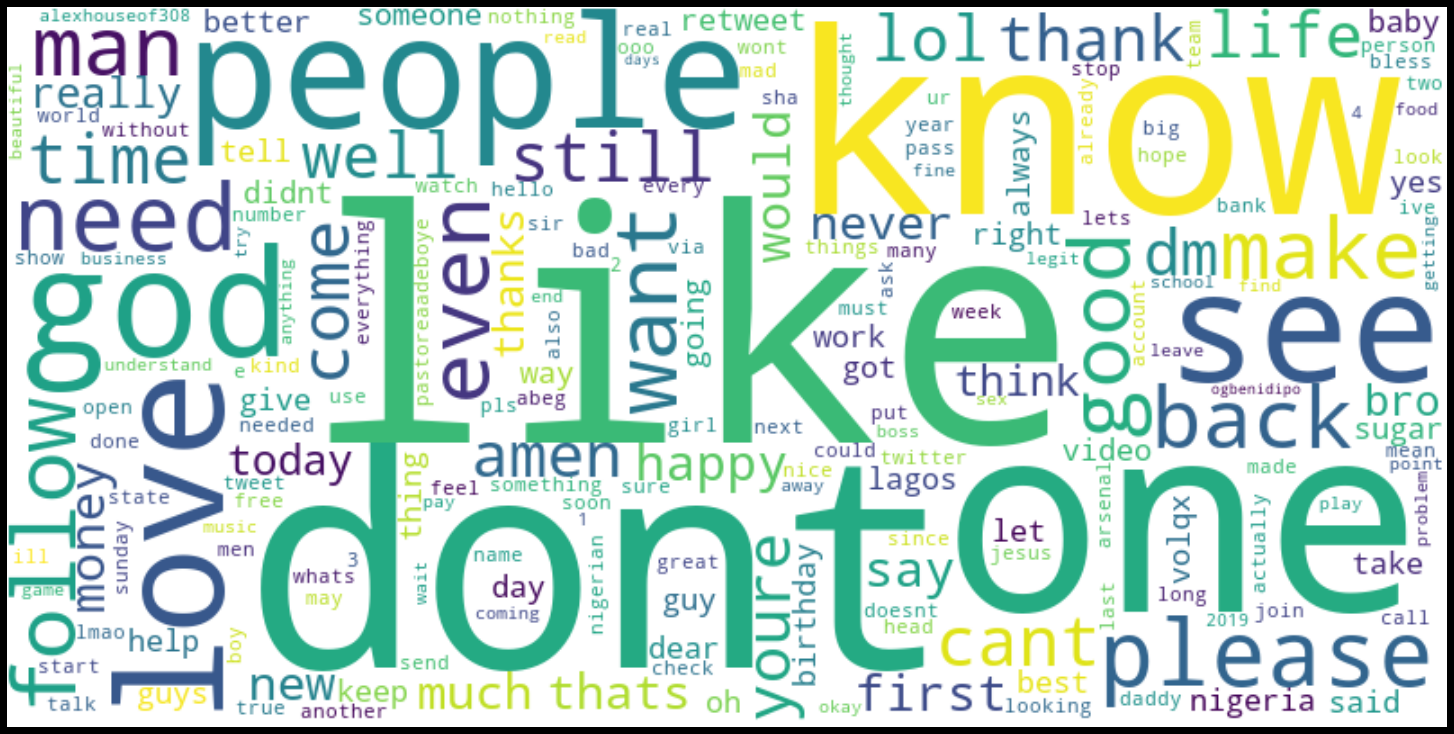

In [118]:
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=180,max_words=200,stopwords=stop_words,background_color="white",
                      width=800, height=400).fit_words(counts_nsw)

# Display the generated image:
plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

#We may also save the image this way
#plt.savefig('wordcloud.png', facecolor='k', bbox_inches='tight')


# Save the image in the img folder:
wordcloud.to_file("Lagos-twitter-word.png")

In [33]:
#We create a new DataFrame to include the polarity and subjectivity measure
data = []

for name,tweet,place,time in zip(df['name'],df['tweet'],df['place'],df['time']):
    #tweet = checkers.loc[:, 'tweet'].iloc[row]
    
    obj = TextBlob(tweet)
    sentiment = obj.sentiment.polarity
    subjectivity = obj.sentiment.subjectivity
    
    data.append({'name': name,'time': time,'tweet': tweet, 'place':place ,'polarity': sentiment, 'subjectivity': subjectivity})
    
data = pd.DataFrame(data)

In [34]:
#re - order data to desire

data = data[['name','tweet','place','time','polarity','subjectivity']]

In [35]:
#Use Polarity to determine sentiment

data.loc[data['polarity'] == 0, 'sentiment'] = 'neutral'  #neutral
data.loc[data['polarity'] <= -0.5, 'sentiment'] = 'very negative'  #very negative
data.loc[data['polarity'] >= 0.5, 'sentiment'] = 'very positve'  #very positive
data.loc[(data['polarity'] < 0) & (data['polarity'] > -0.5) , 'sentiment'] = 'negative'  #negative
data.loc[(data['polarity'] > 0) & (data['polarity'] < 0.5), 'sentiment'] = 'positve'  #positive


data.head(10)

name  \
0                  accryda3   
1             Temisan Okomi   
2                     Ope!™   
3                        S.   
4             Zeelicious!!!   
5           Afro Base NG 🇳🇬   
6            Victor Adegite   
7                 Kelvin K.   
8  Ghost ST. Patrick™.. |🇳🇬   
9                  Accryda2   

                                               tweet           place  \
0  Selling: 898m Land on Elm Street, Osborne Phas...  Lagos, Nigeria   
1  @iamkosby1 @KingArthur9ja @BarakisLight The ma...         Nigeria   
2                 @crazylifevj have you seen this???  Lagos, Nigeria   
3                @Onumashaka Man you're full of shit  Lagos, Nigeria   
4  I’m hitched to Mistokeke @MrOkeke_ https://t.c...  Lagos, Nigeria   
5  RT ComplexMusic: .lilyachty IN THE BUILDING. #...  lagos, Nigeria   
6                               @presh189 Congrats !  Lagos, Nigeria   
7          @_youngking Uber to yours or from yours??     Ajah, Lagos   
8              @Peruzi_VlBES #QuidaxBitcoin11  bader  Lagos, Nigeria   
9  Selling: 898m Land on Elm Street, Osborne Phas...  Lagos, Nigeria   

                  time  polarity  subjectivity sentiment  
0  2019-11-02 21:02:16     0.000      0.000000   neutral  
1  2019-11-02 21:02:15     0.200      0.633333   positve  
2  2019-11-02 21:02:14     0.000      0.000000   neutral  
3  2019-11-02 21:02:14     0.075      0.675000   positve  
4  2019-11-02 21:02:14     0.000      0.000000   neutral  
5  2019-11-02 21:02:14     0.000      0.000000   neutral  
6  2019-11-02 21:02:14     0.000      0.000000   neutral  
7  2019-11-02 21:02:13     0.000      0.000000   neutral  
8  2019-11-02 21:02:13     0.000      0.000000   neutral  
9  2019-11-02 21:02:13     0.000      0.000000   neutral

In [144]:
#Note: The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.

#Define the subjectivity range
data.loc[(data['subjectivity'] > 0.5) & (data['subjectivity'] <= 1.0) , 'subjective-label'] = 'Subjective'  #negative
data.loc[(data['subjectivity'] >= 0) & (data['subjectivity'] <= 0.5), 'subjective-label'] = 'Objective'  #positive

In [36]:
data['sentiment'].value_counts()

neutral          20102
positve           8415
very positve      4580
negative          3829
very negative     1324
Name: sentiment, dtype: int64

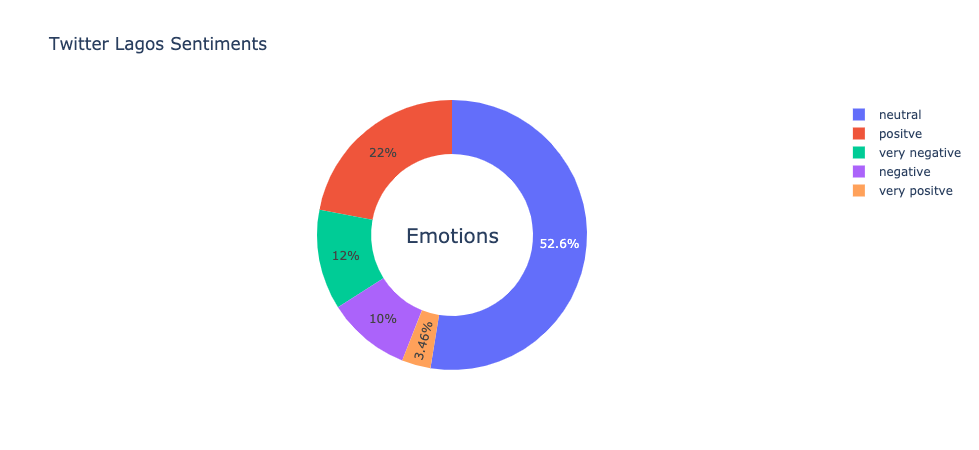

In [152]:
#Lets use Plotly for Better Graphics

import plotly.offline as pyo
import plotly.graph_objs as go
# Set notebook mode to work in offline
pyo.init_notebook_mode()

import plotly.graph_objects as go

labels = list(data['sentiment'].unique())
values = data['sentiment'].value_counts()

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.6)])
fig.update_layout(
    title_text="Twitter Lagos Sentiments",
    
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Emotions', x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.update_layout(
    autosize=False)
fig.show()

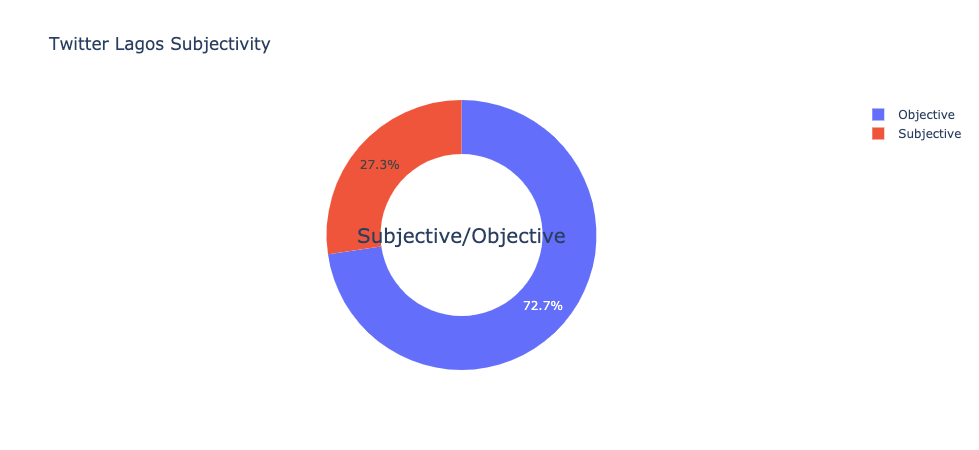

In [151]:
#lets also see how objective or subjective our Lagos people are

labels = list(data['subjective-label'].unique())
values = data['subjective-label'].value_counts()

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.6)])
fig.update_layout(
    title_text="Twitter Lagos Subjectivity",
    
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Subjective/Objective', x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.update_layout(
    autosize=False)
fig.show()

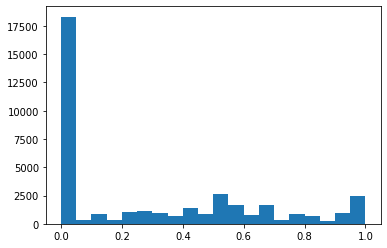

In [133]:
#Note again: The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.

plt.hist(data['subjectivity'],bins=20)
plt.show()

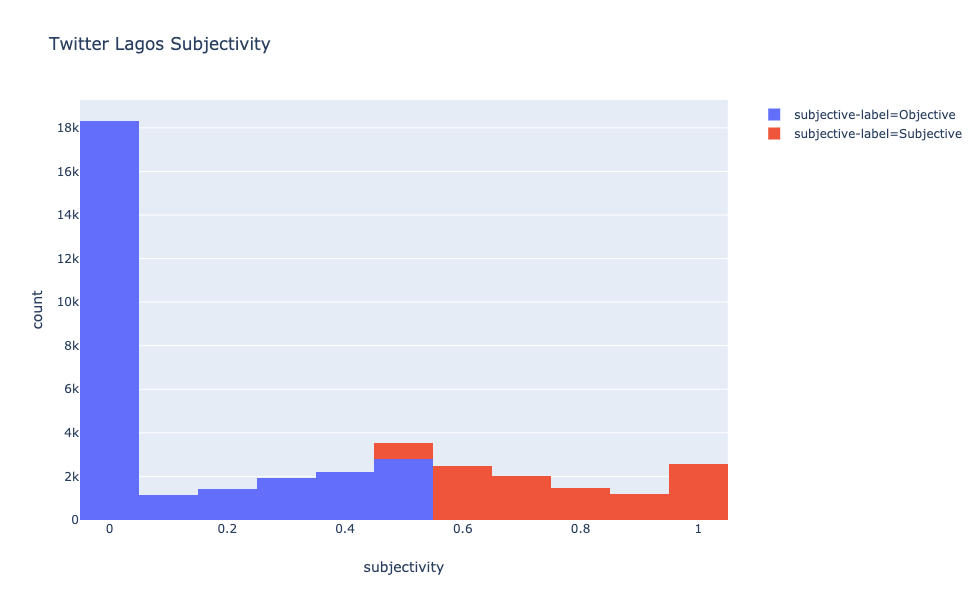

In [150]:
#lets use Plotly instead of matplotlib

import plotly.express as px

fig = px.histogram(data, x="subjectivity",nbins=20,
                   title='Twitter Lagos Subjectivity',color="subjective-label")
fig.update_layout(
    autosize=False,
    width=1000,
    height=600)
fig.show()

In [101]:
#lets define a function that counts some words we are interested in

def word_count(target):
    count = 0
    for words in target:
        count += counts_nsw[words]
    return count

religious_terms = ['jesus','christ','islam','muslim','mosque','church','lord']
religious = word_count(religious_terms)

traffic_terms = ['traffic','transport','bus','uber']
traffic = word_count(traffic_terms)

sex = counts_nsw['sex']   #In this case we read directly from the dictionary

business_terms = ['sell','sale','selling','buy']
business = word_count(business_terms)

buhari_terms = ['buhari','pmb']
buhari = word_count(buhari_terms)

security_terms = ['safe','risky','secure']
security = word_count(security_terms)

affairs_terms = ['bf','gf','sugarmummy','sugardaddy','prostitute','ashawo']
affairs = word_count(affairs_terms)

politics_terms = ['senate','politics','govern','rule','politicians']
politics = word_count(politics_terms)

sars_terms = ['sars','yahoo']
sars = word_count(sars_terms)

In [115]:
total = df.shape[0]  #Total number of tweets
others = total - (religious + traffic + sex + buhari + security + affairs + politics + sars)

#define a percentage calculator
def percent(factor):
    perc = (factor/total)*100
    return perc

specific = {'religious':religious,'traffic':traffic,'sex':sex,'buhari':buhari,'security':security,
           'affairs':affairs,'politics':politics,'sars':sars}

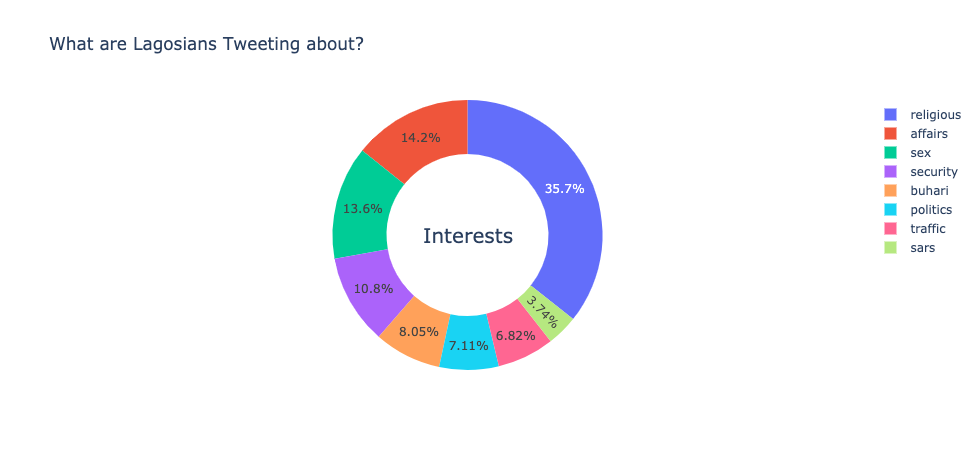

In [116]:
#Lets use another plotly pie-chart

labels = list(specific.keys())
values = list(specific.values())

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.6)])
fig.update_layout(
    title_text="What are Lagosians Tweeting about?",
    
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Interests', x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.show()